# Titanic Dataset Classification
## Nolan Moss
### 4/5/2025
### Intro: a brief introduction that describes the problem and the dataset.

In [25]:
# Import the external Python libraries used (e.g., pandas, numpy, matplotlib, seaborn, sklearn).
# Imports
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, ElasticNet
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import root_mean_squared_error, mean_absolute_error, r2_score


from sklearn.ensemble import RandomForestClassifier


import seaborn as sns
import pandas as pd

from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix

from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

from sklearn.svm import SVC

from sklearn.neural_network import MLPClassifier

#### Section 1. Import and Inspect the Data

In [14]:
# 1.1 Load the dataset and display the first 10 rows.
titanic_ds = pd.read_csv("titanic/train.csv")
print("First 10 rows of the dataset:")
print(titanic_ds.head(10))

# 1.2 Check for missing values and display summary statistics.
print("\nMissing values in each column:")
print(titanic_ds.isnull().sum())

print("\nSummary statistics for numerical columns:")
print(titanic_ds.describe())

First 10 rows of the dataset:
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   
5            6         0       3   
6            7         0       1   
7            8         0       3   
8            9         1       3   
9           10         1       2   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   
5                                   Moran, Mr. James    male   NaN      0   
6                            McCar

Reflection 1: What do you notice about the dataset? Are there any data issues?

Yes, there are issues with this dataset. The features Age, cabin, and Embarked are all misssing values.

#### Section 2. Data Exploration and Preparation

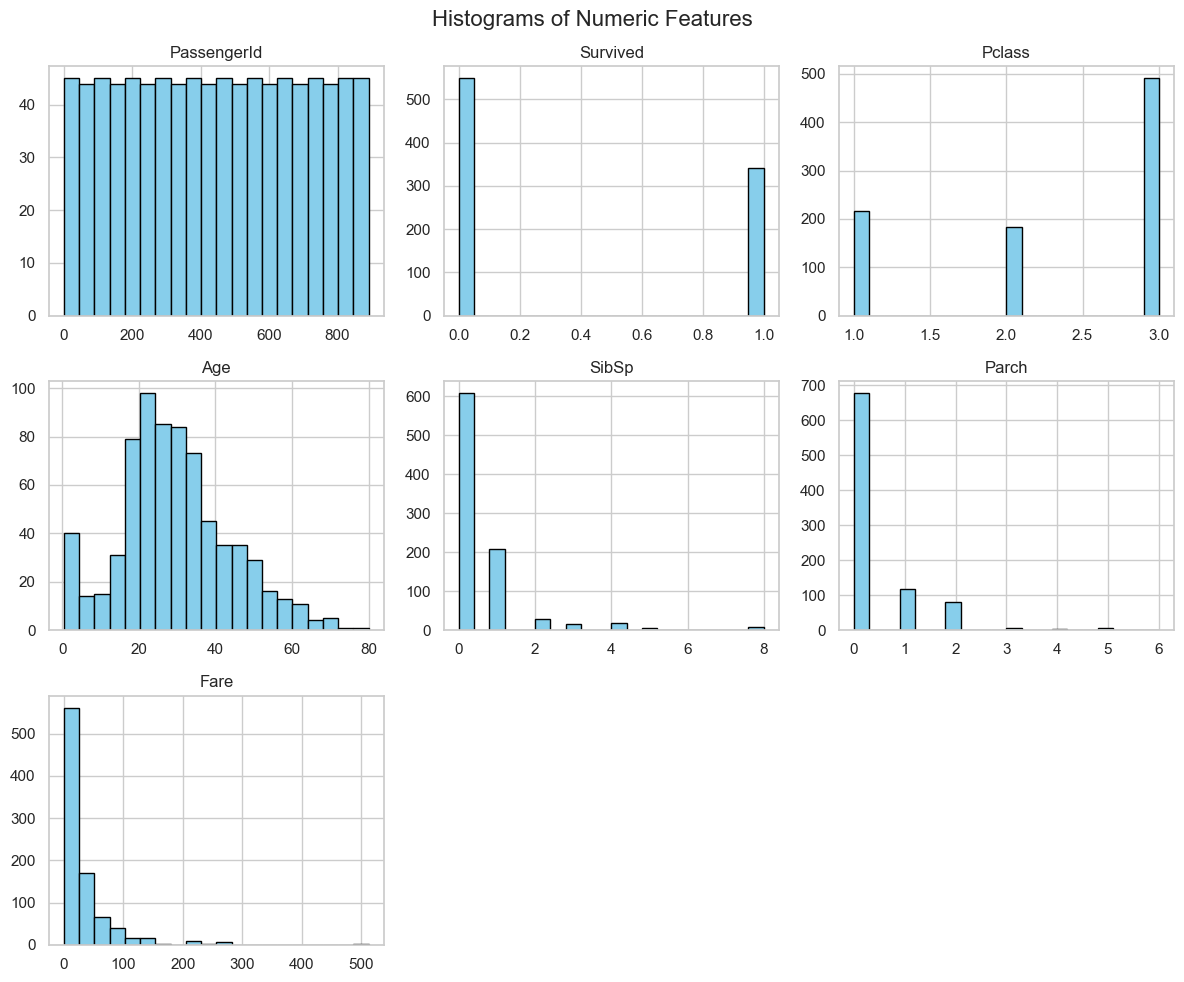

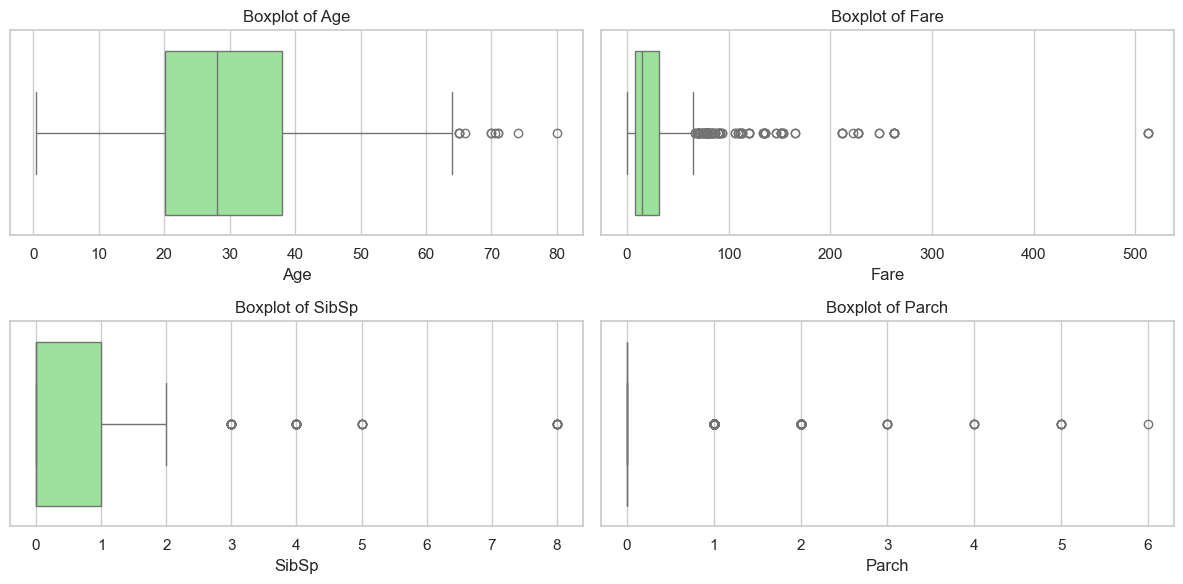

C:\Users\nolan\AppData\Local\Temp\ipykernel_37864\410421283.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=titanic_ds, x=col, palette='pastel')
C:\Users\nolan\AppData\Local\Temp\ipykernel_37864\410421283.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=titanic_ds, x=col, palette='pastel')
C:\Users\nolan\AppData\Local\Temp\ipykernel_37864\410421283.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=titanic_ds, x=col, palette='pastel')


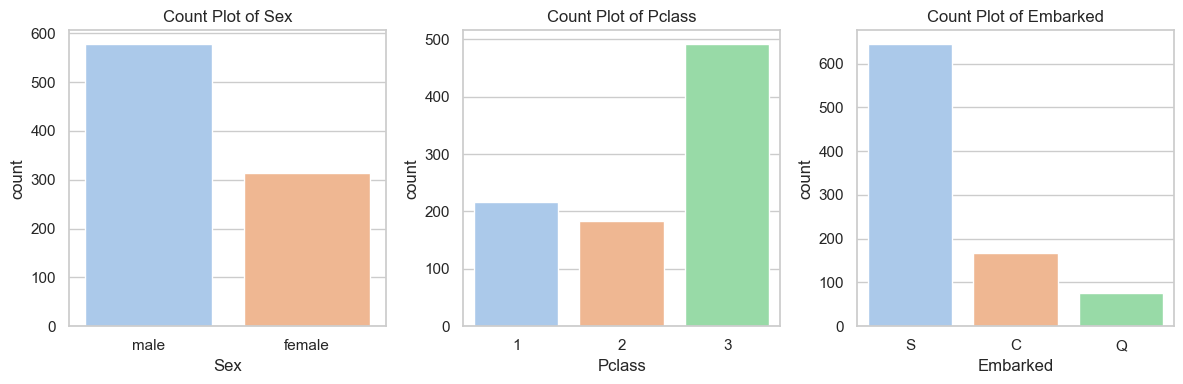

C:\Users\nolan\AppData\Local\Temp\ipykernel_37864\410421283.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=titanic_ds, x='Survived', palette='coolwarm')


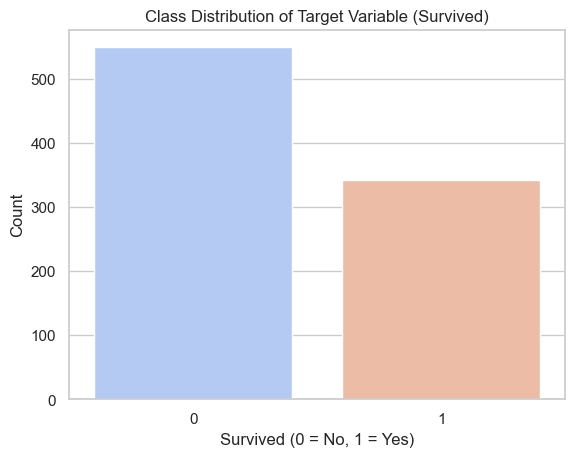


Percentage of each class in 'Survived':
Survived
0    61.62
1    38.38
Name: proportion, dtype: float64


'Create new features (as applicable).\nTransform or combine existing features to improve model performance (as applicable).\nScale or normalize data (as applicable).'

In [ ]:
# 2.1 Explore data patterns and distributions

'''Create histograms, boxplots, and count plots for categorical variables (as applicable).
Identify patterns, outliers, and anomalies in feature distributions.
Check for class imbalance in the target variable (as applicable).'''
# Set plot style
sns.set_theme(style="whitegrid")

# Histogram for numeric variables
titanic_ds.hist(figsize=(12, 10), bins=20, color='skyblue', edgecolor='black')
plt.suptitle("Histograms of Numeric Features", fontsize=16)
plt.tight_layout()
plt.show()

# Boxplots to detect outliers
numeric_cols = ['Age', 'Fare', 'SibSp', 'Parch']
plt.figure(figsize=(12, 6))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x=titanic_ds[col], color='lightgreen')
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

# Count plots for categorical variables
categorical_cols = ['Sex', 'Pclass', 'Embarked']
plt.figure(figsize=(12, 4))
for i, col in enumerate(categorical_cols, 1):
    plt.subplot(1, 3, i)
    sns.countplot(data=titanic_ds, x=col, palette='pastel')
    plt.title(f'Count Plot of {col}')
plt.tight_layout()
plt.show()

# Check for class imbalance in the target variable 'Survived'
sns.countplot(data=titanic_ds, x='Survived', palette='coolwarm')
plt.title('Class Distribution of Target Variable (Survived)')
plt.xlabel('Survived (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()

# Optional: Show percentage of each class
survived_counts = titanic_ds['Survived'].value_counts(normalize=True) * 100
print("\nPercentage of each class in 'Survived':")
print(survived_counts.round(2))




In [18]:
# 2.2 Handle missing values and clean data

'''Impute or drop missing values (as applicable).
Remove or transform outliers (as applicable).
Convert categorical data to numerical format using encoding (as applicable).'''

# impute missing values for Age with the median
titanic_ds['Age'].fillna(titanic_ds['Age'].median(), inplace=True)

# Missing values for Cabin get the mode
titanic_ds['Embarked'].fillna(titanic_ds['Embarked'].mode()[0], inplace=True)

# Missing values for Cabin get the mode
titanic_ds['Cabin'].fillna(titanic_ds['Cabin'].mode()[0], inplace=True)


# Convert categorical columns to numerical using encoding
# One-hot encode 'Sex', 'Embarked', and optionally 'Pclass' (though it can stay numeric)
titanic_ds = pd.get_dummies(titanic_ds, columns=['Sex', 'Embarked'], drop_first=True)


# View updated dataset structure
print("\nDataset after cleaning and encoding:")
print(titanic_ds.info())


Dataset after cleaning and encoding:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Ticket       891 non-null    object 
 8   Fare         891 non-null    float64
 9   Cabin        891 non-null    object 
 10  Sex_male     891 non-null    bool   
 11  Embarked_Q   891 non-null    bool   
 12  Embarked_S   891 non-null    bool   
dtypes: bool(3), float64(2), int64(5), object(3)
memory usage: 72.3+ KB
None


C:\Users\nolan\AppData\Local\Temp\ipykernel_37864\191004665.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic_ds['Age'].fillna(titanic_ds['Age'].median(), inplace=True)
C:\Users\nolan\AppData\Local\Temp\ipykernel_37864\191004665.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as

In [19]:
# 2.3 Feature selection and engineering

'''Create new features (as applicable).
Transform or combine existing features to improve model performance (as applicable).
Scale or normalize data (as applicable).'''

# 2.3 Feature selection and engineering

# --- Feature Engineering ---

# Create a new feature: FamilySize = SibSp + Parch + 1 (including self)
titanic_ds['FamilySize'] = titanic_ds['SibSp'] + titanic_ds['Parch'] + 1

# Create an IsAlone feature
titanic_ds['IsAlone'] = 1  # default to alone
titanic_ds.loc[titanic_ds['FamilySize'] > 1, 'IsAlone'] = 0

# View cleaned and engineered dataset
print("\nDataset after feature engineering and scaling:")
print(titanic_ds.head())


Dataset after feature engineering and scaling:
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name   Age  SibSp  Parch  \
0                            Braund, Mr. Owen Harris  22.0      1      0   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  38.0      1      0   
2                             Heikkinen, Miss. Laina  26.0      0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  35.0      1      0   
4                           Allen, Mr. William Henry  35.0      0      0   

             Ticket     Fare    Cabin  Sex_male  Embarked_Q  Embarked_S  \
0         A/5 21171   7.2500  B96 B98      True       False        True   
1          PC 17599  71.2833      C85     False       False       False   
2  STON/O2. 3101282   7.9250  B96 B98     False      

Reflection 2: What patterns or anomalies do you see? Do any features stand out? What preprocessing steps were necessary to clean and improve the data? Did you create or modify any features to improve performance?


One of the most striking patterns in the data was the high number of passengers who perished compared to the relatively small number who survived, highlighting a clear class imbalance in the target variable. Additionally, several key columns—Age, Embarked, and Cabin—contained missing values. To address this, Age was imputed using the median, as it is less sensitive to outliers than the mean. For the categorical columns Embarked and Cabin, missing values were filled using the mode. To prepare the data for machine learning, I applied one-hot encoding to categorical variables such as Sex and Embarked. Furthermore, I used feature engineering to create a new variable called FamilySize, which combines the number of siblings/spouses and parents/children aboard, offering additional context about passenger groupings.

#### Section 3. Feature Selection and Justification

In [21]:
# 3.1 Choose features and target
'''Select two or more input features (numerical for regression, numerical and/or categorical for classification)
Select a target variable (as applicable)
Regression: Continuous target variable (e.g., price, temperature).
Classification: Categorical target variable (e.g., gender, species).
Clustering: No target variable.
Justify your selection with reasoning.'''

# Since this is a classification task the target variable is "Survived"
# For input features (X), I will select a combination of numerical and categorical variables that are likely to influence survival based on domain knowledge and data exploration.
#Pclass and IsAlone

# 3.2 Define X and y
'''Assign input features to X
Assign target variable to y (as applicable)'''

y = titanic_ds['Survived']
X = titanic_ds[['Pclass', 'IsAlone']]



Reflection 3: Why did you choose these features? How might they impact predictions or accuracy? 

I chose Pclass and IsAlone as input features because they showed meaningful patterns during the exploratory data analysis and are likely to have a significant impact on survival outcomes.

#### Section 4. Train a Model (Classification: Choose 1: Decision Tree, Random Forest, Logistic Regression)

In [24]:
# 4.1 Split the data into training and test sets using train_test_split (or StratifiedShuffleSplit if class imbalance is an issue).
# 4.2 Train model using Scikit-Learn model.fit() method.
# 4.3 Evalulate performance, for example:

'''Regression: R^2, MAE, RMSE (RMSE has been recently updated)
Classification: Accuracy, Precision, Recall, F1-score, Confusion Matrix
Clustering: Inertia, Silhouette Score'''

X1_train, X1_test, y1_train, y1_test = train_test_split(X, y, test_size=0.2, random_state=123)
lr_model1 = LinearRegression().fit(X1_train, y1_train)
y_pred_train1 = lr_model1.predict(X1_train)
y_pred_test1 = lr_model1.predict(X1_test)

# 4.3 Report Performance

print("Case 1: Training R²:", r2_score(y1_train, y_pred_train1))
print("Case 1: Test R²:", r2_score(y1_test, y_pred_test1))
print("Case 1: Test RMSE:", root_mean_squared_error(y1_test, y_pred_test1))
print("Case 1: Test MAE:", mean_absolute_error(y1_test, y_pred_test1))
print()

# Create and train a decision tree model with no random initializer argument
tree_model = DecisionTreeClassifier()
tree_model.fit(X1_train, y1_train)

# Predict and evaluate training data (X train)
y_pred = tree_model.predict(X1_train)  

print("Results for Decision Tree on training data:")  
print(classification_report(y1_train, y_pred))



Case 1: Training R²: 0.13736410887880512
Case 1: Test R²: 0.14313023500876376
Case 1: Test RMSE: 0.4451572823641012
Case 1: Test MAE: 0.4038587781489198

Results for Decision Tree on training data:
              precision    recall  f1-score   support

           0       0.73      0.81      0.77       435
           1       0.64      0.53      0.58       277

    accuracy                           0.70       712
   macro avg       0.68      0.67      0.67       712
weighted avg       0.69      0.70      0.69       712



Reflection 4: How well did the model perform? Any surprises in the results?

#### Section 5. Improve the Model or Try Alternates (Implement a Second Option)

In [ ]:
# 5.1 Train an alternative classifier (e.g., Decision Tree, Random Forest, Logistic Regression) OR adjust hyperparameters on the original model.
# 5.2 Compare performance of all models across the same performance metrics

# Train a Random Forest classifier
rf_model = RandomForestClassifier(random_state=123)
rf_model.fit(X1_train, y1_train)

# Predict using the Random Forest model
y_pred_train_rf = rf_model.predict(X1_train)
y_pred_test_rf = rf_model.predict(X1_test)



# 5.2 Compare performance of Logistic Regression and Random Forest

# Logistic Regression Performance
print("Logistic Regression - Training Accuracy:", accuracy_score(y1_train, y_pred_train1))
print("Logistic Regression - Test Accuracy:", accuracy_score(y1_test, y_pred_test1))
print("Logistic Regression - Precision:", precision_score(y1_test, y_pred_test1))
print("Logistic Regression - Recall:", recall_score(y1_test, y_pred_test1))
print("Logistic Regression - F1-Score:", f1_score(y1_test, y_pred_test1))
print("Logistic Regression - Confusion Matrix:")
print(confusion_matrix(y1_test, y_pred_test1))
print("\n")

# Random Forest Performance
print("Random Forest - Training Accuracy:", accuracy_score(y1_train, y_pred_train_rf))
print("Random Forest - Test Accuracy:", accuracy_score(y1_test, y_pred_test_rf))
print("Random Forest - Precision:", precision_score(y1_test, y_pred_test_rf))
print("Random Forest - Recall:", recall_score(y1_test, y_pred_test_rf))
print("Random Forest - F1-Score:", f1_score(y1_test, y_pred_test_rf))
print("Random Forest - Confusion Matrix:")
print(confusion_matrix(y1_test, y_pred_test_rf))

Reflection 5: Which model performed better? Why might one classifier be more effective in this specific case?

#### Section 6. Final Thoughts & Insights
6.1 Summarize findings.
6.2 Discuss challenges faced.
6.3 If you had more time, what would you try next?

Reflection 6: What did you learn from this project?

4-point Repository Checklist
Verify your repository contains:

[ ] Jupyter Notebook with proper name, numbered sections and reflections.
[ ] README.md (see above) [ ] Dataset, stored in a data folder.
[ ] Peer Review (peer_review.md). 